<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Evaluating SVM on Multiple Data Sets

_Authors: Kiefer Katovich (SF)_

---

In this lab, you'll explore several data sets with SVM classifiers and compare them to logistic regression and KNN classifiers. 

Your "datasets" folder contains the following three data sets to choose from for the lab:

**Breast Cancer**

    ./datasets/breast_cancer_wisconsin

**Spambase**

    ./datasets/spam

**Car Evaluation**

    ./datasets/car_evaluation


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')

from ipywidgets import *
from IPython.display import display

from sklearn.svm import SVC

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

### 1) Load the breast cancer data.

- Are there any missing values? If so, impute or clean the data set.
- Select a classification target and predictors.

In [2]:
cancer = pd.read_csv('./datasets/breast_cancer_wisconsin/breast_cancer.csv')

In [3]:
cancer.shape

(699, 11)

In [4]:
cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
Sample_code_number             699 non-null int64
Clump_Thickness                699 non-null int64
Uniformity_of_Cell_Size        699 non-null int64
Uniformity_of_Cell_Shape       699 non-null int64
Marginal_Adhesion              699 non-null int64
Single_Epithelial_Cell_Size    699 non-null int64
Bare_Nuclei                    699 non-null object
Bland_Chromatin                699 non-null int64
Normal_Nucleoli                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


In [16]:
cancer.drop(list(cancer.loc[cancer['Bare_Nuclei'] ==  '?'].index), axis=0, inplace=True)

In [4]:
cancer = cancer.drop('Sample_code_number', axis=1)

In [19]:
cancer.reset_index(drop=True, inplace=True)

In [20]:
cancer.Bare_Nuclei = cancer.Bare_Nuclei.astype(int)

In [21]:
cancer.isnull().any()

Sample_code_number             False
Clump_Thickness                False
Uniformity_of_Cell_Size        False
Uniformity_of_Cell_Shape       False
Marginal_Adhesion              False
Single_Epithelial_Cell_Size    False
Bare_Nuclei                    False
Bland_Chromatin                False
Normal_Nucleoli                False
Mitoses                        False
Class                          False
dtype: bool

In [23]:
cancer.Class.value_counts()

2    444
4    239
Name: Class, dtype: int64

In [24]:
mapper = {2 : 0, 4: 1}
cancer.Class = cancer.Class.map(mapper)

In [25]:
cancer.Class.value_counts()

0    444
1    239
Name: Class, dtype: int64

In [31]:
cancer.drop('Sample_code_number', axis=1, inplace=True)

In [32]:
y = cancer['Class']
X = cancer.drop('Class', axis=1)

### 2) Build an SVM classifier on the data.

For details on the SVM classifier, [click here](http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html).

- What's the baseline for accuracy?
- Initialize and train a linear SVM. What's the average accuracy score with a five-fold cross-validation?
- Repeat using a radial basis function (RBF) classifier. Compare the scores. Which one is better?
- Print a confusion matrix and classification report for your best model using training and testing data.

**Classification report**:

```python
http://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html
```

**Confusion matrix**:

```python
df_confusion = pd.crosstab(y_true, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)
```

In [45]:
from sklearn.model_selection import cross_val_score, cross_val_predict, train_test_split

In [28]:
print('baseline =', 444/(444+239))

baseline = 0.6500732064421669


In [39]:
svm = SVC(kernel='linear')
np.mean(cross_val_score(svm, X, y, cv=5))

0.9663801027304677

In [40]:
predictions = cross_val_predict(svm, X, y, cv=5)

In [41]:
pd.crosstab(y, predictions, rownames=['Actual'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
Actual,,,
0,432,12,444
1,11,228,239
All,443,240,683


In [42]:
svm = SVC()
np.mean(cross_val_score(svm, X, y, cv=5))

0.9503217085698837

In [44]:
predictions = cross_val_predict(svm, X, y,cv=5)
pd.crosstab(y, predictions, rownames=['Actual'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
Actual,,,
0,413,31,444
1,3,236,239
All,416,267,683


In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3)

In [48]:
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [49]:
predictions = svm.predict(X_test)

In [50]:
pd.crosstab(y_test, predictions, rownames=['Actual'], 
                           colnames=['Predicted'], margins=True)

Predicted,0,1,All
Actual,,,
0,130,3,133
1,1,71,72
All,131,74,205


#### 2.A) Are there more false positives or false negatives? Is this good or bad?

In [11]:
#There are more false positives, this is good- you don't want to miss sick people, telling not sick
#they are sick is ok

### 3) Perform the steps above with a different data set.

Repeat each step.

In [51]:
cars = pd.read_csv('./datasets/car_evaluation/car.csv')

In [52]:
mapper = {'unacc' : 0, 'acc':1, 'good':1, 'vgood':1}
cars['acceptability'] = cars['acceptability'].map(mapper)

In [53]:
mapper = {'vhigh':3, 'high':2, 'med':1, 'low':0}
cars['buying'] = cars['buying'].map(mapper)

In [54]:
mapper = {'vhigh':3, 'high':2, 'med':1, 'low':0}
cars['maint'] = cars.maint.map(mapper)

In [55]:
mapper = {'big':2, 'med':1, 'small':0}
cars['lug_boot'] = cars.lug_boot.map(mapper)

In [56]:
mapper = {'high':2, 'med':1, 'low':0}
cars['safety'] = cars.safety.map(mapper)
cars['doors'] = cars.doors.map(lambda x: 5 if x == '5more' 
                               else x).astype(int)

In [57]:
dummies = pd.get_dummies(cars['persons']).rename(
    columns={'2':'2_seats', '4':'4_seats', 'more':'more_than_4'}).drop('4_seats', axis=1)
new_cars = pd.concat([cars, dummies], axis=1).drop('persons', axis=1)

In [58]:
y = new_cars['acceptability']
X = new_cars.drop('acceptability', axis=1)

In [59]:
svm = SVC(kernel='linear')
print('Avg. Cross-val Linear score: \n', np.round(
    cross_val_score(svm, X, y, cv=5), 3).mean())

Avg. Cross-val Linear score: 
 0.883


In [60]:
svm = SVC(kernel='rbf')
print('Avg. Cross-val RBF score: \n', np.round(
    cross_val_score(svm, X, y, cv=5), 3).mean())

Avg. Cross-val RBF score: 
 0.9321999999999999


In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
svm = SVC(kernel='rbf')
svm.fit(X_train, y_train)
predictions = svm.predict(X_test)

df_confusion = pd.crosstab(y_test, predictions, rownames=['Actual'], 
                           colnames=['Predicted'], margins=True)
df_confusion

Predicted,0,1,All
Actual,,,
0,357,13,370
1,7,142,149
All,364,155,519


### 4) Compare SVM, KNN, and logistic regression using a data set.

You should:

- Use grid-search optimal parameters for each (for SVM, just grid search C and kernel).
- Cross-validate scores.
- Examine confusion matrices and classification reports.

**Bonus:**

Plot "learning curves" for the best models of each. This is a great way see how training/testing size affects the scores. Check out [the documentation](http://scikit-learn.org/stable/modules/learning_curve.html#learning-curves) for how to use this function in scikit-learn.

In [62]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn5 = KNeighborsClassifier()
knn5.fit(X_train, y_train)
predictions = knn5.predict(X_test)
print(pd.crosstab(y_test, predictions, rownames=['Actual'], 
                           colnames=['Predicted'], margins=True), '\n')
print('Accuracy: ', accuracy_score(y_test, predictions))

Predicted    0    1  All
Actual                  
0          369    1  370
1            9  140  149
All        378  141  519 

Accuracy:  0.9807321772639692


In [63]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)
predictions = lr.predict(X_test)

print(pd.crosstab(y_test, predictions, rownames=['Actual'], 
                           colnames=['Predicted'], margins=True), '\n')
print('Accuracy: ', accuracy_score(y_test, predictions))

Predicted    0    1  All
Actual                  
0          350   20  370
1           20  129  149
All        370  149  519 

Accuracy:  0.9229287090558767


In [64]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, valid_scores = learning_curve(KNeighborsClassifier(), X, y, cv=5)

(0.69, 1.0)

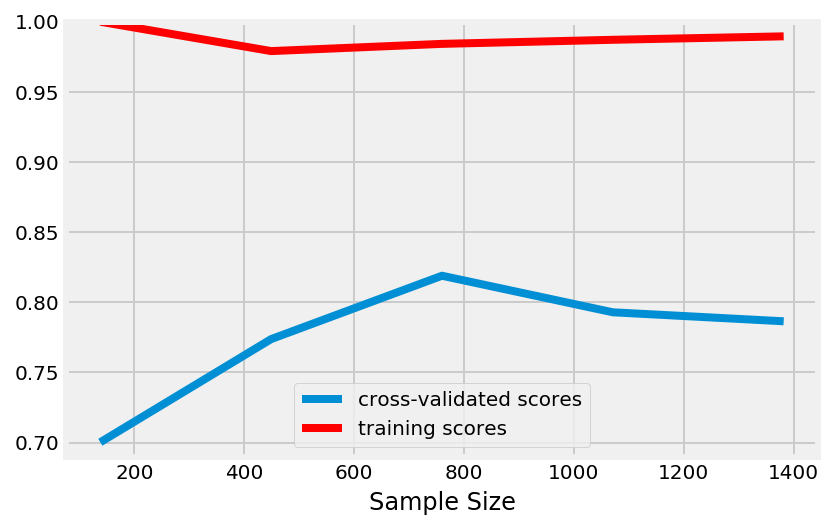

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

scores = []
for score in valid_scores:
    scores.append(score.mean())
_scores = []

for sc in train_scores:
    _scores.append(sc.mean())
    
fig, ax = plt.subplots()
ax.plot(train_sizes, scores, label='cross-validated scores')
ax.plot(train_sizes, _scores, color='red', label='training scores')
ax.set_xlabel('Sample Size')
ax.legend(loc=8)
ax.set_ylim(0.69, 1.0)